# Exercise: A corpus analysis of rock harmony
Trevor de Clercq and David Temperley  
Popular Music (2011) Vol. 30(1), p. 47-70  

This notebook provides an extension of the first example of Kris Shaffer's tutorial [Exploring musical data with R: An introduction to computational music analysis](https://pushpullfork.com/exploring-musical-data-with-r/), which introduces frequency distribution tables/plotting of harmony instances.

Things to learn:
- Description of nominal data
- Data management: for-loops, if-else-conditions

Required: resultsBySong.csv

Read the csv-data set, which provides David Temperley's (dt) annotations, and do some inspections:

In [3]:
dt <- read.csv('resultsBySong.csv')

In [1]:
print(head(dt))
print(tail(dt))
str(dt)

                                        
1 function (x, df, ncp, log = FALSE)    
2 {                                     
3     if (missing(ncp))                 
4         .Call(C_dt, x, df, log)       
5     else .Call(C_dnt, x, df, ncp, log)
6 }                                     
                                        
1 function (x, df, ncp, log = FALSE)    
2 {                                     
3     if (missing(ncp))                 
4         .Call(C_dt, x, df, log)       
5     else .Call(C_dnt, x, df, ncp, log)
6 }                                     
function (x, df, ncp, log = FALSE)  


To understand what these data represent, take a look at section „Analysing the harmony“ in DeClercq + Tempereley 2011, p.54-59.  
Here are Temperley's annotations for the song: "Hey Jude":

In [5]:
print(dt[dt$song=="hey_jude_dt",])

            song start   end   RN relChr relDia tonic abs
3039 hey_jude_dt   0.0   1.0    I      0      1     5   5
3040 hey_jude_dt   1.0   3.0    V      7      5     5   0
3041 hey_jude_dt   3.0   4.0    I      0      1     5   5
3042 hey_jude_dt   4.0   5.0   IV      5      4     5  10
3043 hey_jude_dt   5.0   6.0    I      0      1     5   5
3044 hey_jude_dt   6.0   7.0    V      7      5     5   0
3045 hey_jude_dt   7.0   9.0    I      0      1     5   5
3046 hey_jude_dt   9.0  11.0    V      7      5     5   0
3047 hey_jude_dt  11.0  12.0    I      0      1     5   5
3048 hey_jude_dt  12.0  13.0   IV      5      4     5  10
3049 hey_jude_dt  13.0  14.0    I      0      1     5   5
3050 hey_jude_dt  14.0  15.0    V      7      5     5   0
3051 hey_jude_dt  15.0  17.0    I      0      1     5   5
3052 hey_jude_dt  17.0  17.5   IV      5      4     5  10
3053 hey_jude_dt  17.5  18.0   I6      0      1     5   5
3054 hey_jude_dt  18.0  18.5   ii      2      2     5   7
3055 hey_jude_

## Frequency distribution tables

Frequency distribution tables can be provided for several columns, e.g. for the chromatic intervals above the tonic ("chromatic relative root", relChr).

In [113]:
table(dt$relChr)


   0    1    2    3    4    5    6    7    8    9   10   11 
3065   53  329  232  191 2052   29 1461  386  681  786   35 

You can now rank the chromatic relative roots by their frequency of occurence using `sort()`:

In [114]:
sort(table(dt$relChr))


   6   11    1    4    3    2    8    9   10    7    5    0 
  29   35   53  191  232  329  386  681  786 1461 2052 3065 

Or reverse it in order to return the frequencies of occurence from highest to lowest:

In [115]:
rev(sort(table(dt$relChr)))


   0    5    7   10    9    8    2    3    4    1   11    6 
3065 2052 1461  786  681  386  329  232  191   53   35   29 

This returns a barplot of the frequency distribution:

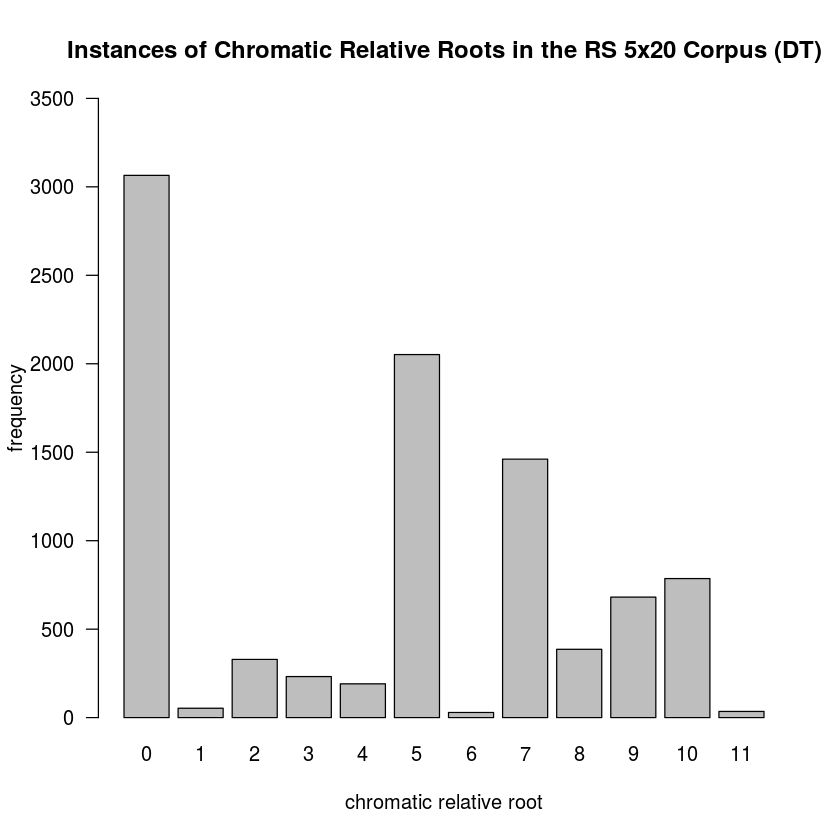

In [13]:
barplot(table(dt$relChr), main="Instances of Chromatic Relative Roots in the RS 5x20 Corpus (DT)", 
         ylab="frequency", xlab="chromatic relative root", ylim=c(0,3500), las=1)

### Distribution of chromatic relative roots in the RS 5x20 corpus (DT's Analysis)

**Table 3 in DeClercq + Temperley 2011, p. 60**

This table shows:
- frequencies of chrom. rel. roots
- relative frequencies of chrom. rel. roots
- number of songs that cover at least one of the chrom. rel. roots (RN "I" or relChr 0 in 99 instances of songs means: all songs include at least one tonic)

Here's the frequency distribution table again. For columnar orientation of data, use function `cbind()` (which returns a matrix.)

In [117]:
print(cbind(table(dt$relChr)))

   [,1]
0  3065
1    53
2   329
3   232
4   191
5  2052
6    29
7  1461
8   386
9   681
10  786
11   35


In [ ]:
instances <- cbind(table(dt$relChr))

Create a table of relative frequencies by the additional function `prop.table()`:

In [16]:
print(prop.table(cbind(table(dt$relChr))))

          [,1]
0  0.329569892
1  0.005698925
2  0.035376344
3  0.024946237
4  0.020537634
5  0.220645161
6  0.003118280
7  0.157096774
8  0.041505376
9  0.073225806
10 0.084516129
11 0.003763441


Rounding these numbers to 3 decimal places is provided by additionl `round()`:

In [19]:
print(round(prop.table(cbind(table(dt$relChr))),3))

    [,1]
0  0.330
1  0.006
2  0.035
3  0.025
4  0.021
5  0.221
6  0.003
7  0.157
8  0.042
9  0.073
10 0.085
11 0.004


In [21]:
prop <- round(prop.table(cbind(table(dt$relChr))),3)

### Exercises for the next session:

1. The calculations of "Song instances", i.e. the number of songs that cover at least one of the chrom. rel. roots, is a bit more tricky.   
Your homework is to think of some code that provides these calculations.   
Remember function `unique()` to extract unique elements of a vector ... that function may be useful.

2. Combine "Instances", "Proportion of total" and "Song instances" to a single table that looks pretty much the same like table 3 in DeClercq + Temperley, p.60.

3. This is a pencil and paper exercise. Take a close look at the data frame and think of a strategy to indentify and annotate all pre- and all post-tonics of songs. Pre-tonics mean: antecedent chords of tonics, post-tonics mean  consequent chords of tonics.   
Annotation should be provided in separate columns for pre- and post-tonics.  
Draw a sketch of your strategy, or write a "recipe" to achieve correct annotations.